In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [65]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [67]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [68]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [69]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [70]:
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

In [71]:
df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'], inplace=True)

In [72]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,0
1,80.23,31,68441.85,193.77,1,0,4,4,1
2,69.47,26,59785.94,236.50,0,0,3,13,20
3,74.15,29,54806.18,245.89,1,0,1,10,2
4,68.37,35,73889.99,225.58,0,0,6,3,3


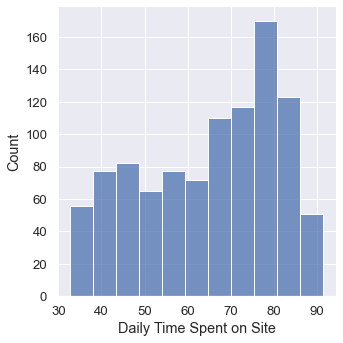

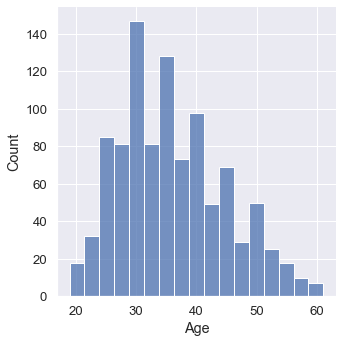

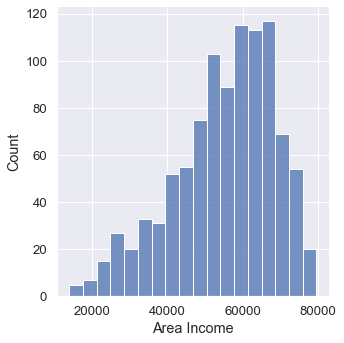

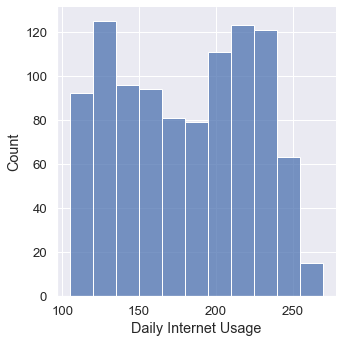

In [73]:
for col in df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]:
    sns.displot(df[col])
    plt.show()

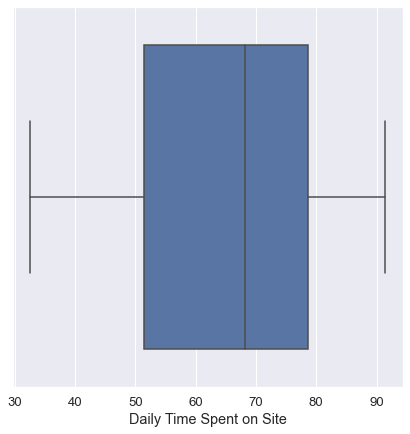

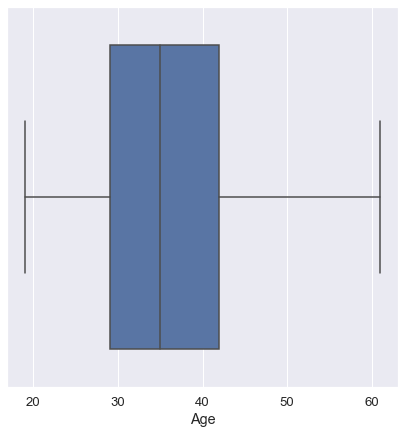

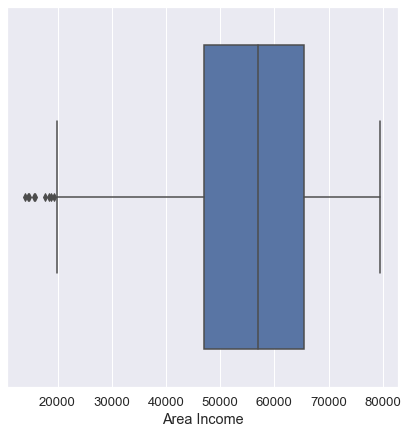

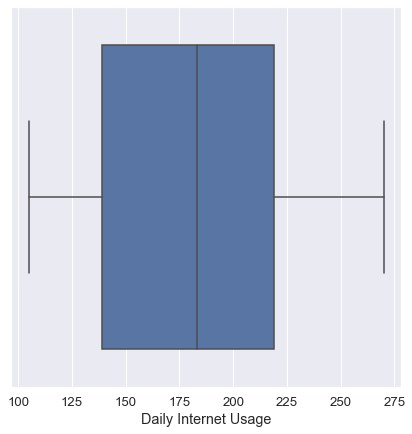

In [74]:
for col in df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]:
    sns.boxplot(df[col])
    plt.show()

In [75]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Month', 'Day',
       'Hour'],
      dtype='object')

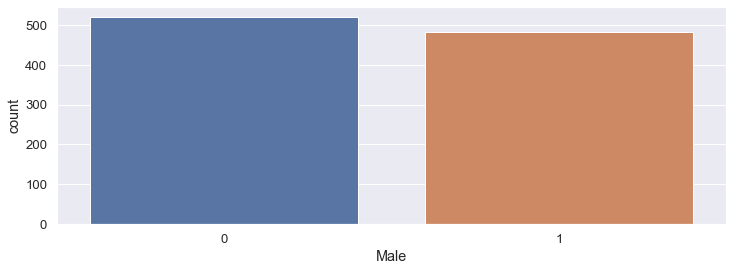

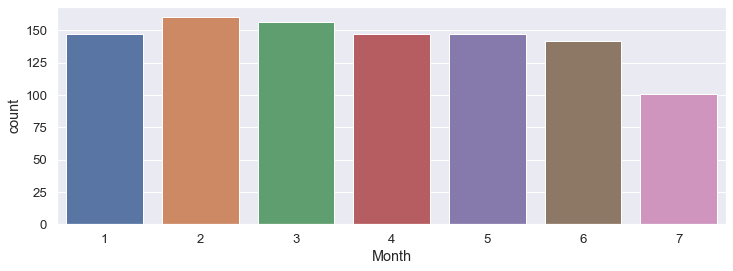

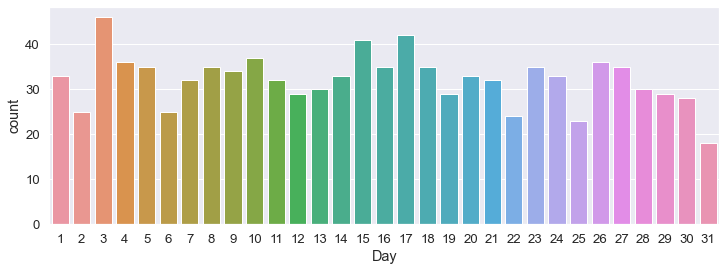

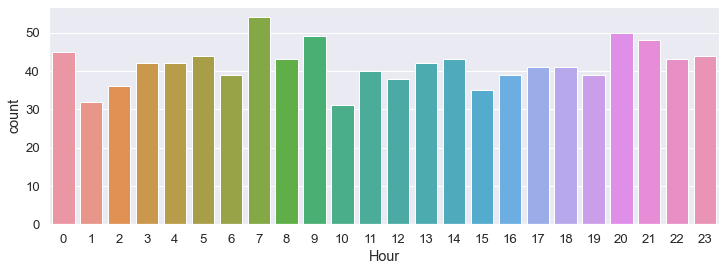

In [78]:
for col in df[['Male', 'Month', 'Day', 'Hour']]:
    plt.figure(figsize=(12,4))
    sns.countplot(df[col])
    plt.show()

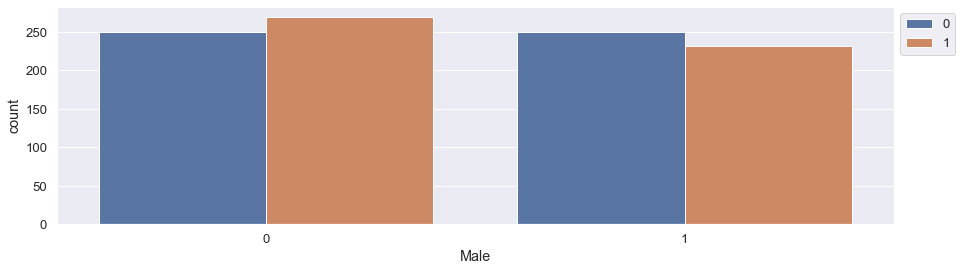

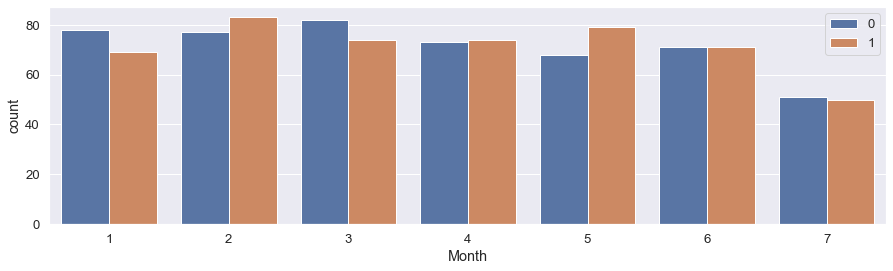

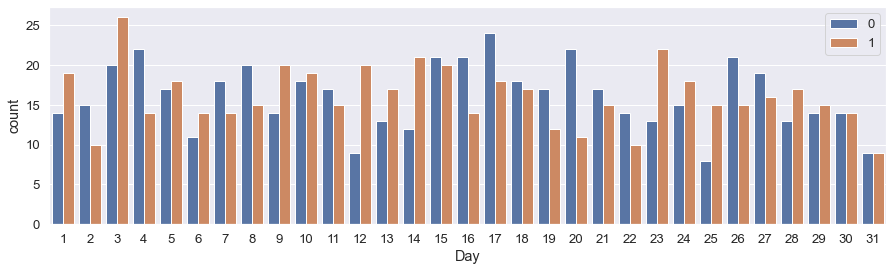

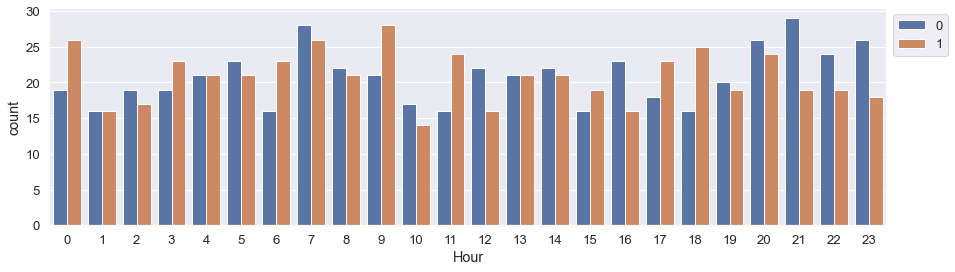

In [82]:
for col in df[['Male', 'Month', 'Day', 'Hour']]:
    if col !='Clicked on Ad':
        plt.figure(figsize=(15,4))
        sns.countplot(df[col], hue=df['Clicked on Ad'])
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()

<AxesSubplot:xlabel='Age', ylabel='Daily Internet Usage'>

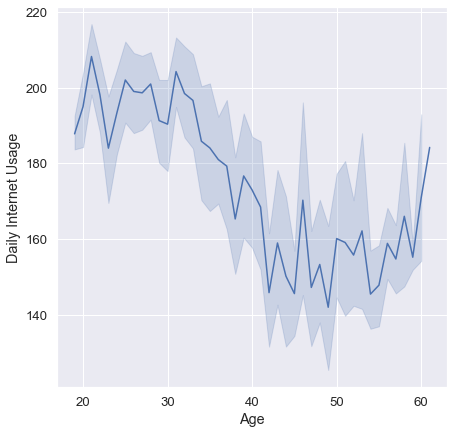

In [85]:
sns.lineplot(x=df['Age'], y=df['Daily Internet Usage'])

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

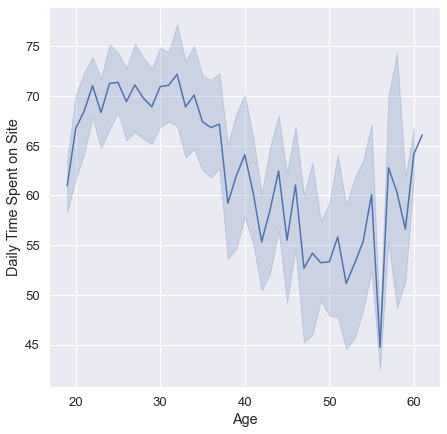

In [86]:
sns.lineplot(x=df['Age'], y=df['Daily Time Spent on Site'])

<AxesSubplot:>

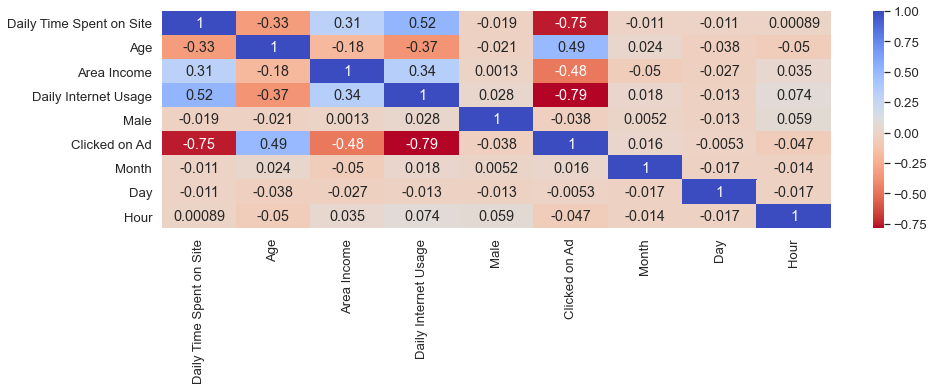

In [84]:
plt.figure(figsize=(15,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm_r')

In [48]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [87]:
x = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=None)

In [93]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [94]:
models = {
    "LOR": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    'Naive': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier(),
    'SVM': SVC()
}

In [99]:
for name, model in models.items():
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')  
    print('-'*30)

Using model: LOR
Training Score: 0.9725
Test Score: 0.975
------------------------------
Using model: KNN
Training Score: 0.9675
Test Score: 0.975
------------------------------
Using model: Naive
Training Score: 0.9675
Test Score: 0.97
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.95
------------------------------
Using model: RF
Training Score: 1.0
Test Score: 0.97
------------------------------
Using model: XGB
Training Score: 1.0
Test Score: 0.955
------------------------------
Using model: SVM
Training Score: 0.9775
Test Score: 0.975
------------------------------
